# Gradient Descent

#### Solve linear regression with GD from scratch.

#### team: Hossein Karami - Zahra Karimi
* [github](https://github.com/karamih/Gradient_Descent)

## Import libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create Dataset

In [2]:
np.random.seed(42)

# Generate 1000 random values between 0 and 1
X = np.random.rand(1000, 1)  

# Generate y values with the equation y = 6x + 10 + noise
y = 6 * X + 10 + np.random.randn(1000, 1)

data = np.column_stack((X, y))

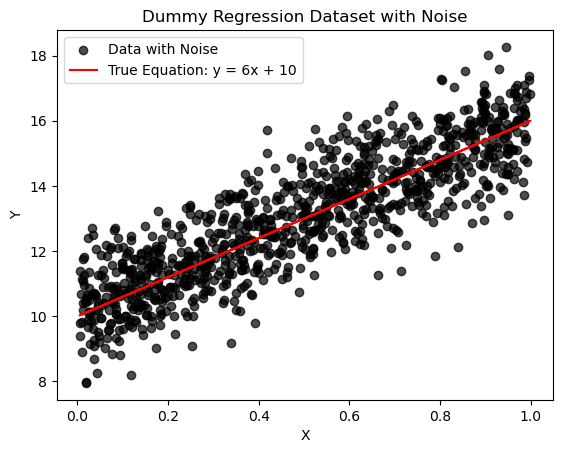

In [3]:
# Plot the dataset
plt.scatter(X, y, c='black', alpha=0.7, label='Data with Noise')
plt.plot(X, 6 * X + 10, color='red', label='True Equation: y = 6x + 10')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Dummy Regression Dataset with Noise')
plt.show()

## Split Dataset

In [4]:
def train_test_split(data, train_percent: float):
    # Shuffle the indices
    indices = np.random.permutation(len(data))

    # Split the data into training and testing sets
    split = int(train_percent * len(data))
    train_indices, test_indices = indices[:split], indices[split:]

    # Extract training and testing data
    X_train, y_train = data[train_indices, :-1], data[train_indices, -1]
    X_test, y_test = data[test_indices, :-1], data[test_indices, -1]
    
    return X_train, y_train, X_test, y_test

# Split the data into training and testing sets (80% train, 20% test)
X_train, y_train, X_test, y_test = train_test_split(data, 0.8)

## Plot Splited Data

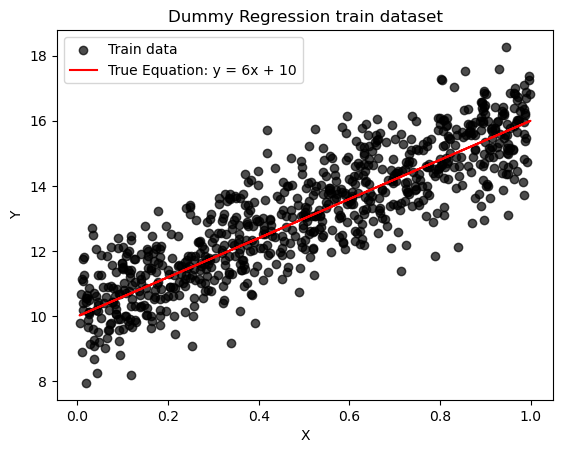

In [5]:
# Plot the train dataset
plt.scatter(X_train, y_train, c='black', alpha=0.7, label='Train data')
plt.plot(X, 6 * X + 10, color='red', label='True Equation: y = 6x + 10')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Dummy Regression train dataset')
plt.show()

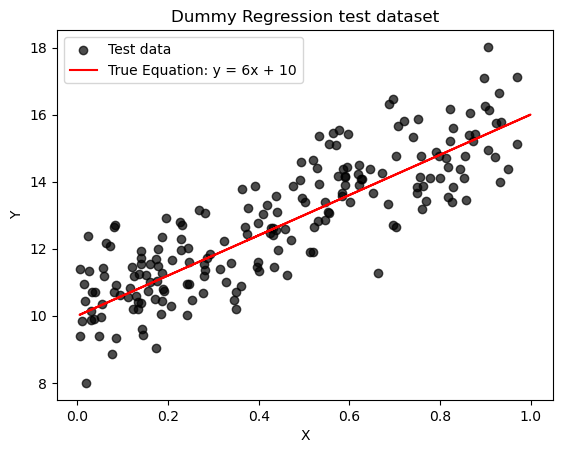

In [6]:
# Plot the test dataset
plt.scatter(X_test, y_test, c='black', alpha=0.7, label='Test data')
plt.plot(X, 6 * X + 10, color='red', label='True Equation: y = 6x + 10')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Dummy Regression test dataset')
plt.show()

## Gradient Descent Algorithem

### Step1: Random Initialization Weights

In [7]:
def initialize():
    b=np.random.rand()
    theta=np.random.rand(1)
    return b,theta

b,theta = initialize()
print(f'Bias: {b}\tWeight: {theta}')

Bias: 0.8652957589089124	Weight: [0.15727321]


### Step2: Predict Weights

In [8]:
def predict(b,theta,X):
    return b + np.dot(X,theta)

prediction = predict(b,theta,X_train)
prediction[0:5], prediction.shape

(array([0.93094333, 0.96473399, 0.8717233 , 0.93107418, 0.93695836]), (800,))

### Step3: Calculate Cost

In [9]:
def mse_cost(y_true,y_pred):
    y_resd = y_true-y_pred
    return np.sum(np.dot(y_resd.T,y_resd))/len(y_true-y_resd)

y_pred = predict(b, theta, X_train)
mse_cost(y_train, y_pred)

151.87005343359743

### Step4: Update Weights

In [10]:
def update_theta(X,y_true,y_pred,b,theta,learning_rate):
    db = (np.sum(y_pred-y_true)*2)/len(y)
    dw = (np.dot((y_pred-y_true),X)*2)/len(y)
    b_new = b-learning_rate*db
    theta_new = theta-learning_rate*dw
    return b_new,theta_new

print(f"After initialization -Bias: {b}\ttheta: {theta}")
y_pred = predict(b, theta, X_train)
b, theta = update_theta(X_train, y_train, y_pred, b, theta, 0.01)
print("After first update -Bias: ",b,"theta: ",theta)
print(f'cost: {mse_cost(y_train,y_pred)}')

After initialization -Bias: 0.8652957589089124	theta: [0.15727321]
After first update -Bias:  1.0600347793542428 theta:  [0.26312237]
cost: 151.87005343359743


### In one place

In [11]:
def run_gradient_descent(X, Y, alpha, num_iterations):
    b, theta = initialize()
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'b', 'theta', 'cost'])
    result_idx = 0
    for each_iter in range(num_iterations):
        y_pred = predict(b,theta,X)
        this_cost = mse_cost(Y,y_pred)
        prev_b=b
        prev_theta=theta
        b, theta = update_theta(X,Y,y_pred,prev_b,prev_theta,alpha)
        if(iter_num % 10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num,b ,theta[0],this_cost]
            result_idx = result_idx+1
        iter_num += 1
    return gd_iterations_df, b, theta

gd_iterations_df,b,theta = run_gradient_descent(X_train,y_train,alpha=0.01,num_iterations=500)

In [12]:
print(f'theta: {theta[0]}\tb: {b}')

gd_iterations_df.tail()

theta: 5.740279740904496	b: 10.228690518195922


,iteration,b,theta,cost
45,450.0,10.231117,5.734364,0.962683
46,460.0,10.230661,5.735624,0.962660
47,470.0,10.230180,5.736854,0.962638
48,480.0,10.229680,5.738057,0.962617
49,490.0,10.229164,5.739237,0.962596


### Plot Results

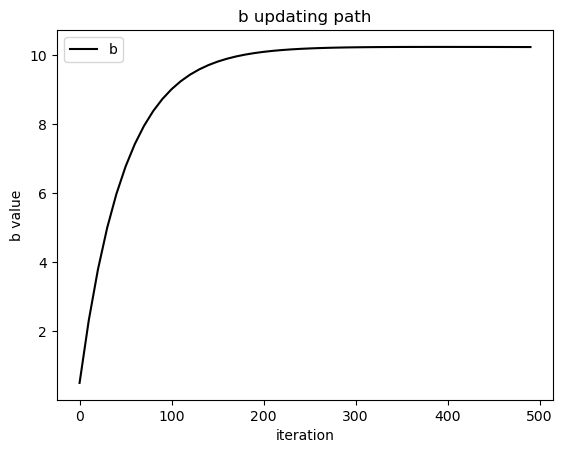

In [13]:
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['b'], c='black', label='b')
plt.xlabel('iteration')
plt.ylabel('b value')
plt.title('b updating path')
plt.legend()

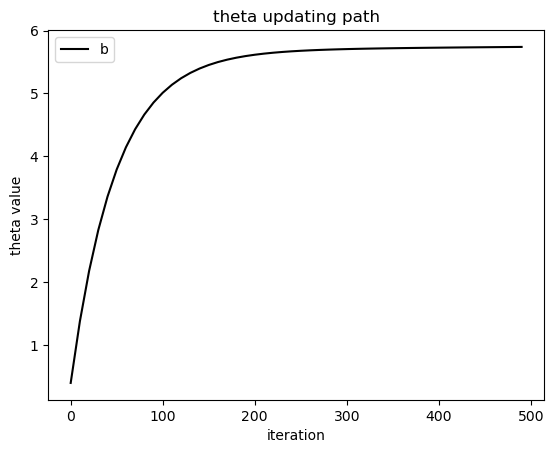

In [14]:
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['theta'], c='black', label='b')
plt.xlabel('iteration')
plt.ylabel('theta value')
plt.title('theta updating path')
plt.legend()

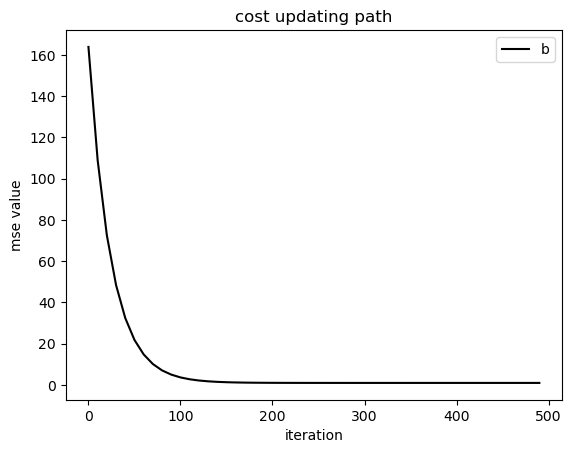

In [15]:
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'], c='black', label='b')
plt.xlabel('iteration')
plt.ylabel('mse value')
plt.title('cost updating path')
plt.legend()

Text(0.5, 0, 'Cost value')

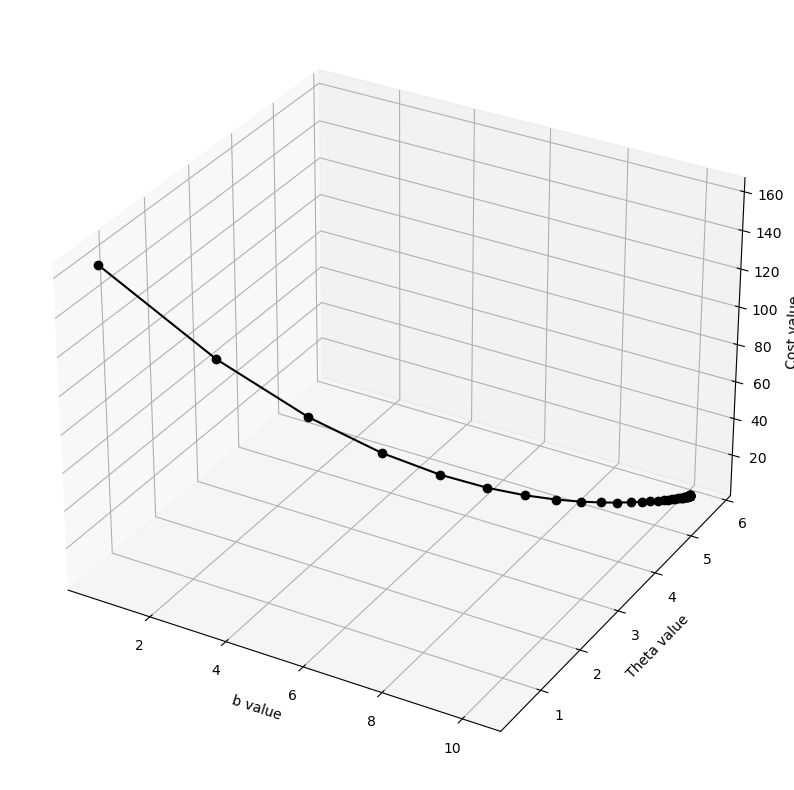

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gd_iterations_df['b'], gd_iterations_df['theta'], gd_iterations_df['cost'], c='k', marker='o')

ax.set_xlabel('b value')
ax.set_ylabel('Theta value')
ax.set_zlabel('Cost value')

### Compare GD with 2 different learning rate

In [17]:
# with learning rate 0.001 and iteration 1000
gd_iterations_df_1,b,theta = run_gradient_descent(X_train,y_train,alpha=0.001,num_iterations=1000)

# with learning rate 0.01 and iteration 500
gd_iterations_df_2,b,theta = run_gradient_descent(X_train,y_train,alpha=0.01,num_iterations=500)

Text(0.5, 0, 'Cost value')

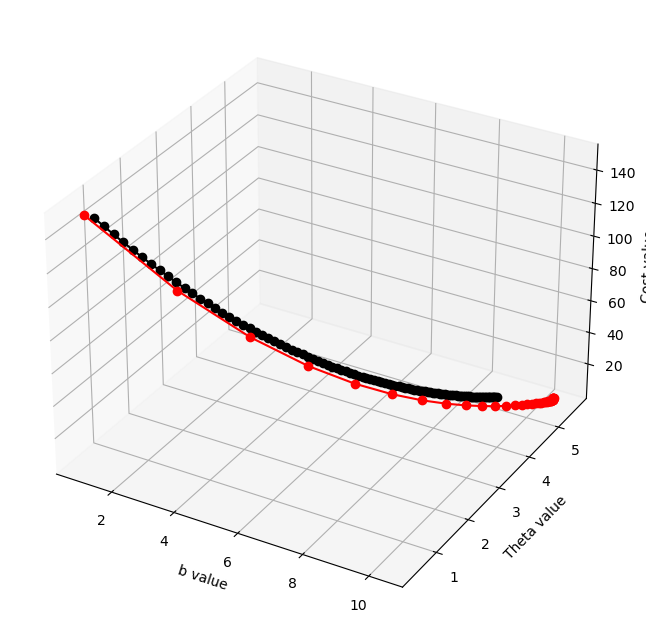

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gd_iterations_df_1['b'], gd_iterations_df_1['theta'], gd_iterations_df_1['cost'], c='k', marker='o')
ax.plot(gd_iterations_df_2['b'], gd_iterations_df_2['theta'], gd_iterations_df_2['cost'], c='r', marker='o')


ax.set_xlabel('b value')
ax.set_ylabel('Theta value')
ax.set_zlabel('Cost value')

## Batch Gradient Descent

In [28]:
def run_batch_gradient_descent(X, Y, alpha, num_iterations, batch_size=50):
    b, theta = initialize()
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'b', 'theta', 'cost'])
    result_idx = 0

    for each_iter in range(num_iterations):
        batch_indices = np.random.choice(len(X), size=batch_size, replace=False)
        X_batch = X[batch_indices]
        Y_batch = Y[batch_indices]

        y_pred = predict(b, theta, X_batch)
        this_cost = mse_cost(Y_batch, y_pred)

        prev_b = b
        prev_theta = theta
        b, theta = update_theta(X_batch, Y_batch, y_pred, prev_b, prev_theta, alpha)

        if iter_num % 10 == 0:
            gd_iterations_df.loc[result_idx] = [iter_num, b, theta[0], this_cost]
            result_idx += 1

        iter_num += 1

    return gd_iterations_df, b, theta

gd_b_iterations_df , b_batch, theta_batch = run_batch_gradient_descent(X_train, y_train, alpha=0.01, num_iterations=500)

#### batch GD with batch size 50

In [29]:
print(f'theta: {theta_batch[0]}\tb: {b_batch}')

gd_b_iterations_df.tail()

theta: 3.371569330360993	b: 4.803008055256408


,iteration,b,theta,cost
45,450.0,4.468308,3.192861,51.730730
46,460.0,4.538981,3.231361,48.074554
47,470.0,4.607350,3.266853,47.851917
48,480.0,4.675488,3.302717,47.047861
49,490.0,4.743055,3.339736,42.577131


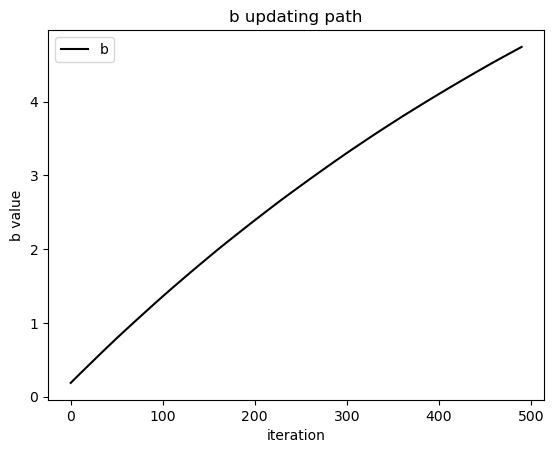

In [30]:
plt.plot(gd_b_iterations_df['iteration'], gd_b_iterations_df['b'], c='black', label='b')
plt.xlabel('iteration')
plt.ylabel('b value')
plt.title('b updating path')
plt.legend()

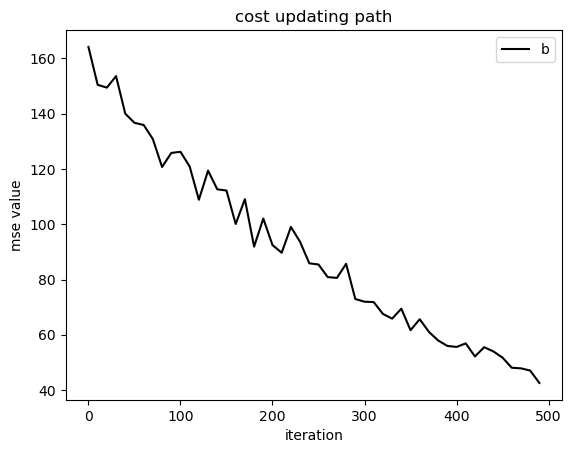

In [31]:
plt.plot(gd_b_iterations_df['iteration'], gd_b_iterations_df['cost'], c='black', label='b')
plt.xlabel('iteration')
plt.ylabel('mse value')
plt.title('cost updating path')
plt.legend()

Text(0.5, 0, 'Cost value')

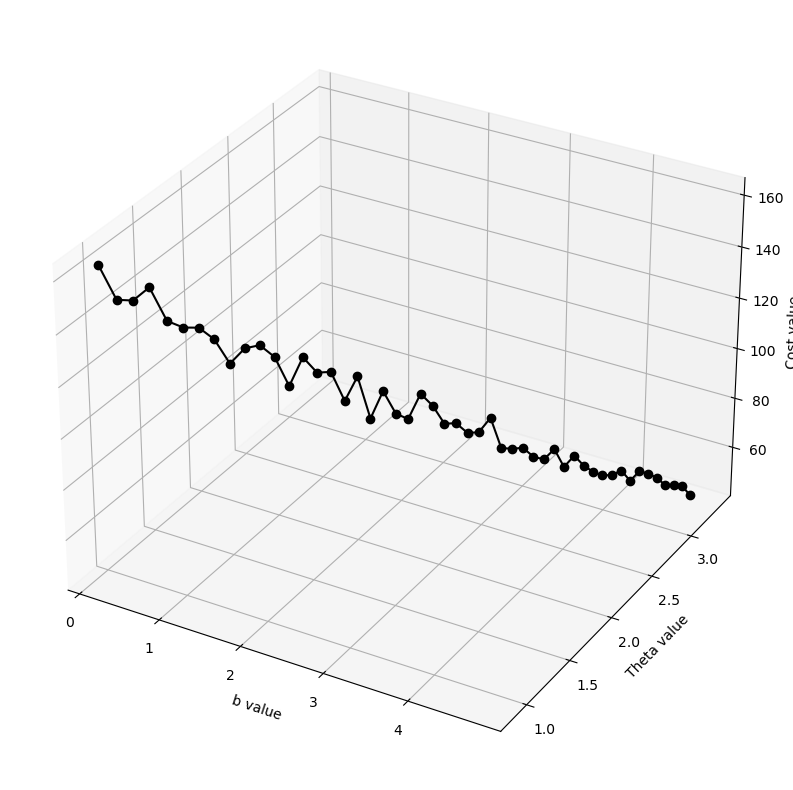

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gd_b_iterations_df['b'], gd_b_iterations_df['theta'], gd_b_iterations_df['cost'], c='k', marker='o')

ax.set_xlabel('b value')
ax.set_ylabel('Theta value')
ax.set_zlabel('Cost value')

### Compare convexing of two optimizer:
* one with batch size 50
* another with batch size 100

In [33]:
# with size of batch size => 50
gd_b_iterations_df, b, theta = run_batch_gradient_descent(X_train,y_train,alpha=0.01,num_iterations=500)

# with size of batch size => 100
gd_b_100_iterations_df, b, theta = run_batch_gradient_descent(X_train,y_train,alpha=0.01,num_iterations=500, batch_size=100)

Text(0.5, 0, 'Cost value')

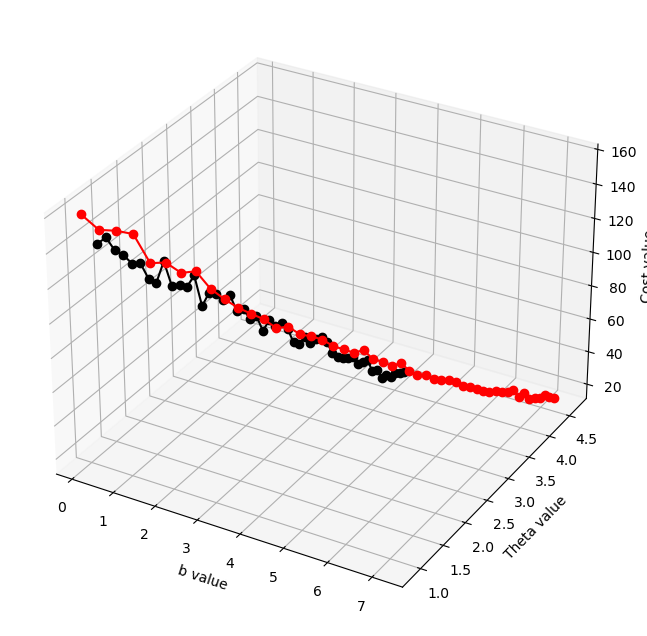

In [34]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gd_b_iterations_df['b'], gd_b_iterations_df['theta'], gd_b_iterations_df['cost'], c='k', marker='o')
ax.plot(gd_b_100_iterations_df['b'], gd_b_100_iterations_df['theta'], gd_b_100_iterations_df['cost'], c='r', marker='o')


ax.set_xlabel('b value')
ax.set_ylabel('Theta value')
ax.set_zlabel('Cost value')

### Compare two optimezer:
* one with GD
* another with batch GD with batch size 100

Text(0.5, 0, 'Cost value')

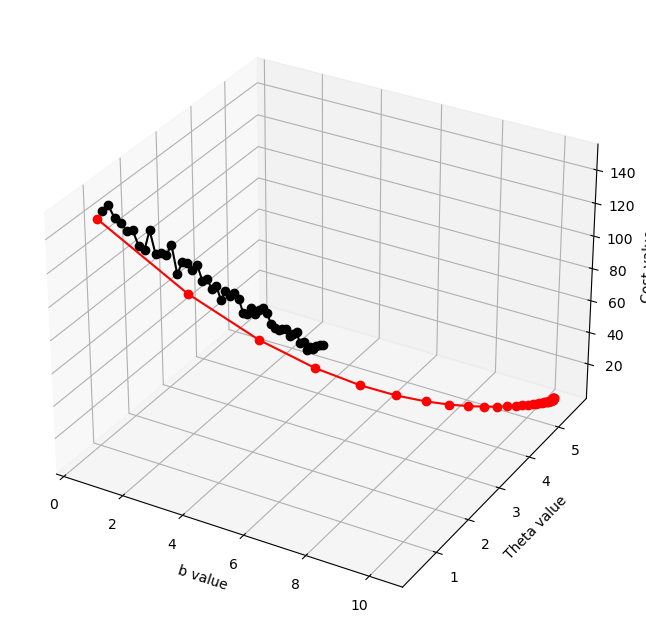

In [35]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gd_b_iterations_df['b'], gd_b_iterations_df['theta'], gd_b_iterations_df['cost'], c='k', marker='o')
ax.plot(gd_iterations_df_2['b'], gd_iterations_df_2['theta'], gd_iterations_df_2['cost'], c='r', marker='o')


ax.set_xlabel('b value')
ax.set_ylabel('Theta value')
ax.set_zlabel('Cost value')

## Online Gradient Descent

In [38]:
def run_online_gradient_descent(X, Y, alpha, num_iterations):
    b, theta = initialize()
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'b', 'theta', 'cost'])
    result_idx = 0

    for each_iter in range(num_iterations):
        online_indices = np.random.choice(len(X), size=1, replace=False)
        x_point = X[online_indices]
        y_point = Y[online_indices]

        y_pred = predict(b, theta, x_point)
        this_cost = mse_cost(y_point, y_pred)

        prev_b = b
        prev_theta = theta
        b, theta = update_theta(x_point, y_point, y_pred, prev_b, prev_theta, alpha)

        if iter_num % 10 == 0:
            gd_iterations_df.loc[result_idx] = [iter_num, b, theta[0], this_cost]
            result_idx += 1

        iter_num += 1

    return gd_iterations_df, b, theta

online_gd, b_online, theta_online = run_online_gradient_descent(X_train, y_train, alpha=0.01, num_iterations=500)

### Online GD with 500 iteration

In [39]:
print(f'theta: {theta_online[0]}\tb: {b_online}')

online_gd.tail()

theta: 0.8868952619659304	b: 0.32852826514633254


,iteration,b,theta,cost
45,450.0,0.316483,0.880334,181.380190
46,460.0,0.318964,0.881865,176.104827
47,470.0,0.321307,0.883021,218.106638
48,480.0,0.323773,0.884226,99.791804
49,490.0,0.326233,0.885527,198.950032


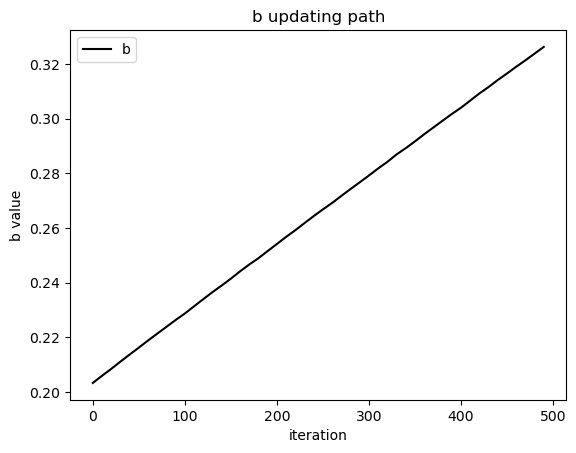

In [40]:
plt.plot(online_gd['iteration'], online_gd['b'], c='black', label='b')
plt.xlabel('iteration')
plt.ylabel('b value')
plt.title('b updating path')
plt.legend()

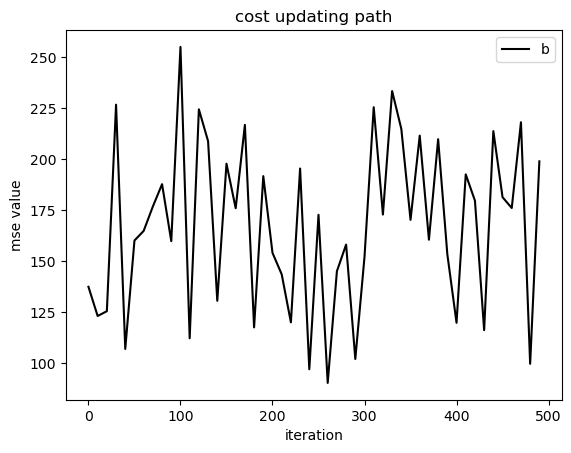

In [41]:
plt.plot(online_gd['iteration'], online_gd['cost'], c='black', label='b')
plt.xlabel('iteration')
plt.ylabel('mse value')
plt.title('cost updating path')
plt.legend()

Text(0.5, 0, 'Cost value')

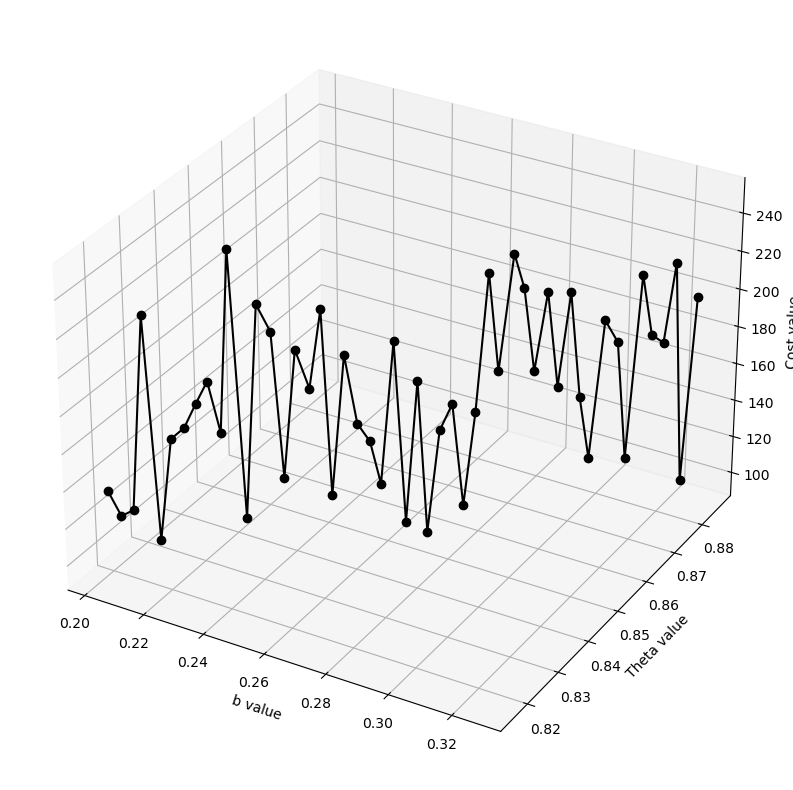

In [42]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(online_gd['b'], online_gd['theta'], online_gd['cost'], c='k', marker='o')

ax.set_xlabel('b value')
ax.set_ylabel('Theta value')
ax.set_zlabel('Cost value')

### Here we compare 3 Optimizer:
* Gradient descent
* Batch Gradient Descent (batch size = 100)
* Online Gradient Descent

#### all of optimizers trained on 500 iteration and learning rate 0.01.

Text(0.5, 0, 'Cost value')

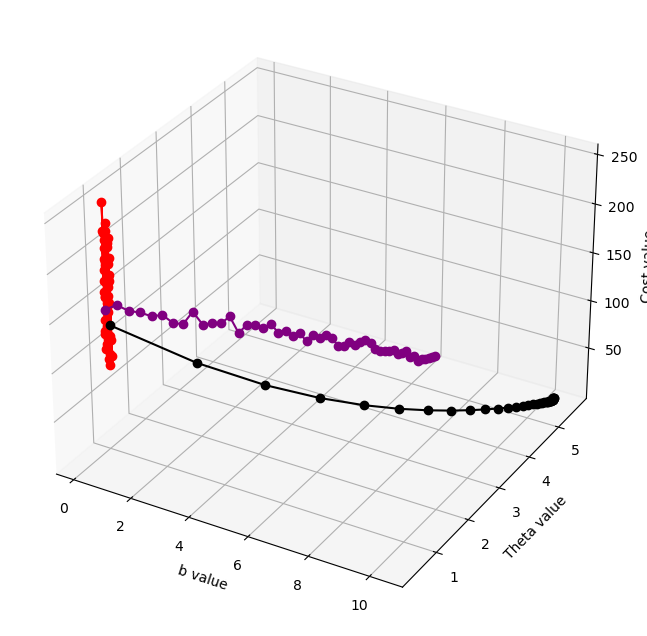

In [45]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(online_gd['b'], online_gd['theta'], online_gd['cost'], c='red', marker='o')
ax.plot(gd_b_100_iterations_df['b'], gd_b_100_iterations_df['theta'], gd_b_iterations_df['cost'], c='purple', marker='o')
ax.plot(gd_iterations_df_2['b'], gd_iterations_df_2['theta'], gd_iterations_df_2['cost'], c='black', marker='o')


ax.set_xlabel('b value')
ax.set_ylabel('Theta value')
ax.set_zlabel('Cost value')